
# SpaceX Falcon 9 — Data Wrangling & EDA (Portfolio-ready)

**Purpose:** Clean, explore, and visualize SpaceX launch data (from SpaceX API).  
This notebook contains robust data loading (local CSV or API fallback), cleaning, feature engineering, static and interactive visualizations (Matplotlib/Seaborn + Plotly), and final export steps for GitHub.

**What to expect**
- Imports and environment setup
- Robust data loading (use `spacex_api.csv` if present; otherwise fetch the API)
- Data cleaning & feature engineering
- Static EDA visuals (Matplotlib / Seaborn)
- Interactive EDA visuals (Plotly)
- Export cleaned CSV for portfolio/GitHub


In [1]:
# 1. Setup & Imports
import sys, os
COLAB = False
try:
    import google.colab
    COLAB = True
except Exception:
    COLAB = False

if COLAB:
    # Uncomment in Colab if needed
    # !pip install pandas matplotlib seaborn plotly requests beautifulsoup4 folium --quiet
    pass

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
print("Imports ready. Python", sys.version.split()[0])


Imports ready. Python 3.11.3


In [2]:
# 2. Robust Data Loading
API_CSV = 'spacex_api.csv'
CLEANED_CSV = 'cleaned_spacex_api.csv'

def fetch_and_save_api(csv_path=API_CSV):
    url = "https://api.spacexdata.com/v4/launches"
    print('Fetching data from SpaceX API...')
    r = requests.get(url, timeout=30)
    r.raise_for_status()
    data = r.json()
    df = pd.json_normalize(data)
    df.to_csv(csv_path, index=False)
    print(f'Fetched and saved API data to {csv_path} with shape', df.shape)
    return df

if os.path.exists(API_CSV):
    print(f'Loading local file: {API_CSV}')
    api_df = pd.read_csv(API_CSV)
else:
    try:
        api_df = fetch_and_save_api(API_CSV)
    except Exception as e:
        raise RuntimeError('Failed to fetch API data and no local file found: ' + str(e))

print('Data shape:', api_df.shape)
api_df.head()


Fetching data from SpaceX API...
Fetched and saved API data to spacex_api.csv with shape (205, 43)
Data shape: (205, 43)


,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,capsules,payloads,launchpad,flight_number,name,date_utc,date_unix,date_local,date_precision,upcoming,cores,auto_update,tbd,launch_library_id,id,fairings.reused,fairings.recovery_attempt,fairings.recovered,fairings.ships,links.patch.small,links.patch.large,links.reddit.campaign,links.reddit.launch,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],[],[5eb0e4b5b6c3bb0006eeb1e1],5e9e4502f5090995de566f86,1,FalconSat,2006-03-24T22:30:00.000Z,1143239400,2006-03-25T10:30:00+12:00,hour,False,"[{'core': '5e9e289df35918033d3b2623', 'flight'...",True,False,None,5eb87cd9ffd86e000604b32a,False,False,False,[],https://images2.imgbox.com/94/f2/NN6Ph45r_o.png,https://images2.imgbox.com/5b/02/QcxHUb5V_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],[],[5eb0e4b6b6c3bb0006eeb1e2],5e9e4502f5090995de566f86,2,DemoSat,2007-03-21T01:10:00.000Z,1174439400,2007-03-21T13:10:00+12:00,hour,False,"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",True,False,None,5eb87cdaffd86e000604b32b,False,False,False,[],https://images2.imgbox.com/f9/4a/ZboXReNb_o.png,https://images2.imgbox.com/80/a2/bkWotCIS_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],[],"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...",5e9e4502f5090995de566f86,3,Trailblazer,2008-08-03T03:34:00.000Z,1217734440,2008-08-03T15:34:00+12:00,hour,False,"[{'core': '5e9e289ef3591814873b2625', 'flight'...",True,False,None,5eb87cdbffd86e000604b32c,False,False,False,[],https://images2.imgbox.com/6c/cb/na1tzhHs_o.png,https://images2.imgbox.com/4a/80/k1oAkY0k_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],[],[5eb0e4b7b6c3bb0006eeb1e5],5e9e4502f5090995de566f86,4,RatSat,2008-09-28T23:15:00.000Z,1222643700,2008-09-28T11:15:00+12:00,hour,False,"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",True,False,None,5eb87cdbffd86e000604b32d,False,False,False,[],https://images2.imgbox.com/95/39/sRqN7rsv_o.png,https://images2.imgbox.com/a3/99/qswRYzE8_o.png,None,None,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],[],[5eb0e4b7b6c3bb0006eeb1e6],5e9e4502f5090995de566f86,5,RazakSat,2009-07-13T03:35:00.000Z,1247456100,2009-07-13T15:35:00+12:00,hour,False,"[{'core': '5e9e289ef359184f103b2627', 'flight'...",True,False,None,5eb87cdcffd86e000604b32e,False,False,False,[],https://images2.imgbox.com/ab/5a/Pequxd5d_o.png,https://images2.imgbox.com/92/e4/7Cf6MLY0_o.png,None,None,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [3]:
# 3. Cleaning & Feature Engineering
df = api_df.copy()
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('\n', '_')

keep_candidates = ['flight_number','name','date_utc','static_fire_date_utc','rocket','launchpad','success','details','payloads','cores']
keep_cols = [c for c in keep_candidates if c in df.columns]
print('Keeping columns:', keep_cols)
df = df[keep_cols].copy()

if 'date_utc' in df.columns:
    df['date_utc'] = pd.to_datetime(df['date_utc'], errors='coerce')
elif 'static_fire_date_utc' in df.columns:
    df['date_utc'] = pd.to_datetime(df['static_fire_date_utc'], errors='coerce')

df['launch_year'] = df['date_utc'].dt.year
df['launch_month'] = df['date_utc'].dt.month

if 'success' in df.columns:
    df['success'] = df['success'].fillna(False).astype(int)
else:
    df['success'] = pd.NA

if 'name' in df.columns:
    df['mission'] = df['name'].astype(str)

def extract_core_info(x, key):
    try:
        if pd.isna(x): return pd.NA
        if isinstance(x, str):
            import json
            try: parsed = json.loads(x)
            except Exception: parsed = eval(x)
        else: parsed = x
        if isinstance(parsed, list) and len(parsed)>0 and isinstance(parsed[0], dict):
            return parsed[0].get(key, pd.NA)
        return pd.NA
    except Exception:
        return pd.NA

if 'cores' in df.columns:
    df['core_reused'] = df['cores'].apply(lambda x: extract_core_info(x, 'reused'))
    df['core_landing_success'] = df['cores'].apply(lambda x: extract_core_info(x, 'landing_success'))
else:
    df['core_reused'], df['core_landing_success'] = pd.NA, pd.NA

if 'payloads' in df.columns:
    def payload_count(x):
        try:
            if pd.isna(x): return 0
            if isinstance(x, str):
                import json; p = json.loads(x)
            else: p = x
            if isinstance(p, list): return len(p)
            return 1
        except Exception: return pd.NA
    df['payload_count'] = df['payloads'].apply(payload_count)
else:
    df['payload_count'] = pd.NA

if 'flight_number' in df.columns:
    df.drop_duplicates(subset=['flight_number'], inplace=True)
else:
    df.drop_duplicates(inplace=True)

df.to_csv(CLEANED_CSV, index=False)
print('Cleaned data saved to', CLEANED_CSV)
df.head()


Keeping columns: ['flight_number', 'name', 'date_utc', 'static_fire_date_utc', 'rocket', 'launchpad', 'success', 'details', 'payloads', 'cores']
Cleaned data saved to cleaned_spacex_api.csv


C:\Users\sarth\AppData\Local\Temp\ipykernel_23672\510936458.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['success'] = df['success'].fillna(False).astype(int)
C:\Users\sarth\AppData\Local\Temp\ipykernel_23672\510936458.py:49: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if pd.isna(x): return 0


,flight_number,name,date_utc,static_fire_date_utc,rocket,launchpad,success,details,payloads,cores,launch_year,launch_month,mission,core_reused,core_landing_success,payload_count
0,1,FalconSat,2006-03-24 22:30:00+00:00,2006-03-17T00:00:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,0,Engine failure at 33 seconds and loss of vehicle,[5eb0e4b5b6c3bb0006eeb1e1],"[{'core': '5e9e289df35918033d3b2623', 'flight'...",2006,3,FalconSat,False,None,1
1,2,DemoSat,2007-03-21 01:10:00+00:00,None,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,0,Successful first stage burn and transition to ...,[5eb0e4b6b6c3bb0006eeb1e2],"[{'core': '5e9e289ef35918416a3b2624', 'flight'...",2007,3,DemoSat,False,None,1
2,3,Trailblazer,2008-08-03 03:34:00+00:00,None,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,0,Residual stage 1 thrust led to collision betwe...,"[5eb0e4b6b6c3bb0006eeb1e3, 5eb0e4b6b6c3bb0006e...","[{'core': '5e9e289ef3591814873b2625', 'flight'...",2008,8,Trailblazer,False,None,<NA>
3,4,RatSat,2008-09-28 23:15:00+00:00,2008-09-20T00:00:00.000Z,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,1,Ratsat was carried to orbit on the first succe...,[5eb0e4b7b6c3bb0006eeb1e5],"[{'core': '5e9e289ef3591855dc3b2626', 'flight'...",2008,9,RatSat,False,None,1
4,5,RazakSat,2009-07-13 03:35:00+00:00,None,5e9d0d95eda69955f709d1eb,5e9e4502f5090995de566f86,1,None,[5eb0e4b7b6c3bb0006eeb1e6],"[{'core': '5e9e289ef359184f103b2627', 'flight'...",2009,7,RazakSat,False,None,1


✅ Dataset Summary
Total Records: 201

📉 Missing Values Summary:


,Missing Values,% Missing
static_fire_date_utc,80,39.80
details,67,33.33
core_landing_success,48,23.88
payload_count,13,6.47
core_reused,10,4.98


C:\Users\sarth\AppData\Local\Temp\ipykernel_23672\146033654.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df['% Missing'], y=missing_df.index, palette='viridis')


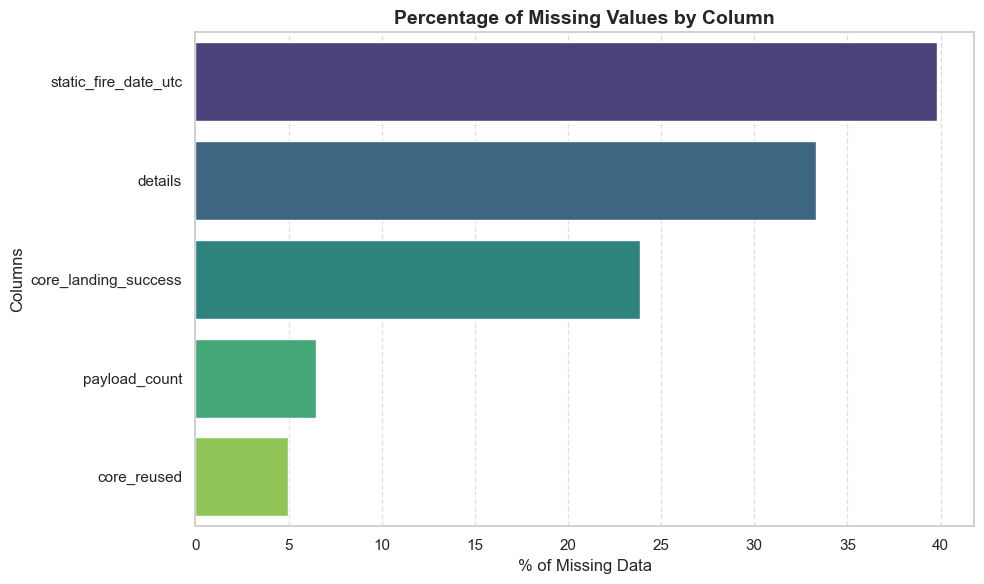

In [ ]:
# 4. Clean Summary of Missing Values (No heatmap, just clear stats)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("✅ Dataset Summary")
print(f"Total Records: {len(df)}\n")

# Calculate missing values
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_counts / len(df) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Values': missing_counts,
    '% Missing': missing_percent
})

# Filter only columns with missing data
missing_df = missing_df[missing_df['Missing Values'] > 0]

if missing_df.empty:
    print("🎉 No missing values detected — your dataset is complete!")
else:
    print("📉 Missing Values Summary:")
    display(missing_df)

    # Visualize with a clean bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df['% Missing'], y=missing_df.index, palette='viridis')
    plt.title("Percentage of Missing Values by Column", fontsize=14, fontweight='bold')
    plt.xlabel("% of Missing Data")
    plt.ylabel("Columns")
    plt.grid(axis='x', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

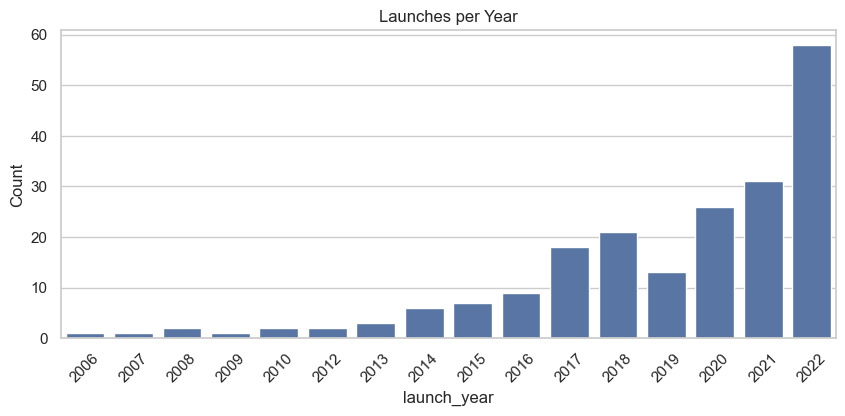

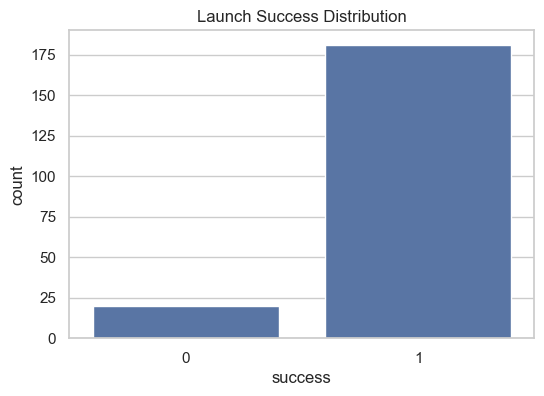

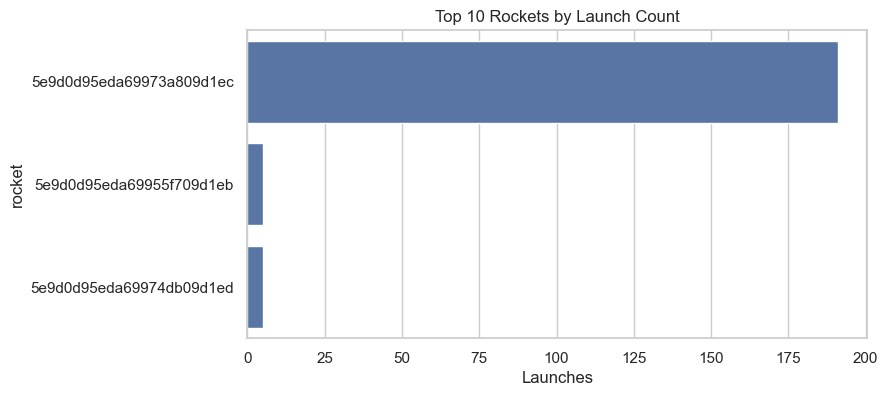

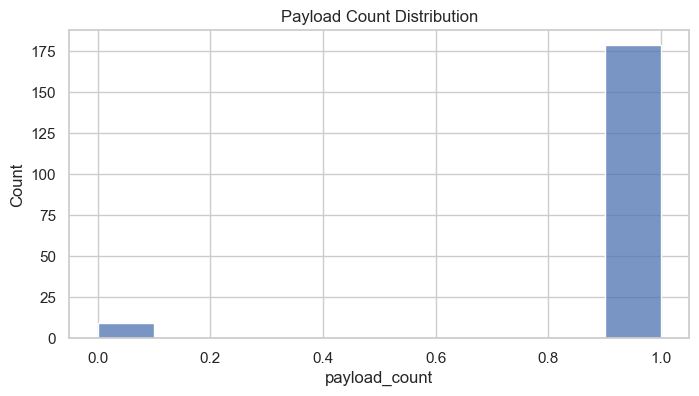

In [5]:
# 5. Static Visualizations
plt.rcParams.update({'figure.max_open_warning': 0})

if 'launch_year' in df.columns:
    plt.figure(figsize=(10,4))
    sns.countplot(x='launch_year', data=df, order=sorted(df['launch_year'].dropna().unique()))
    plt.xticks(rotation=45); plt.title('Launches per Year'); plt.ylabel('Count'); plt.show()

if 'success' in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x='success', data=df)
    plt.title('Launch Success Distribution'); plt.show()

if 'rocket' in df.columns:
    top_rockets = df['rocket'].value_counts().head(10)
    plt.figure(figsize=(8,4))
    sns.barplot(x=top_rockets.values, y=top_rockets.index)
    plt.title('Top 10 Rockets by Launch Count'); plt.xlabel('Launches'); plt.show()

if 'payload_count' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['payload_count'].dropna(), bins=10, kde=False)
    plt.title('Payload Count Distribution'); plt.show()


In [6]:
# 6. Interactive Plotly Visualizations
if 'launch_year' in df.columns and df['success'].notna().any():
    yearly = df.groupby('launch_year')['success'].mean().reset_index()
    yearly['success_pct'] = yearly['success'] * 100
    fig = px.line(yearly, x='launch_year', y='success_pct', markers=True, title='Launch Success Rate by Year (%)')
    fig.update_layout(xaxis_title='Year', yaxis_title='Success Rate (%)')
    fig.show()

if 'rocket' in df.columns:
    counts = df['rocket'].value_counts().reset_index()
    counts.columns = ['rocket','count']
    fig2 = px.bar(counts.head(15), x='count', y='rocket', orientation='h', title='Top Rocket Launch Counts')
    fig2.update_layout(yaxis={'categoryorder':'total ascending'})
    fig2.show()

if 'payload_count' in df.columns and df['success'].notna().any():
    # Replace pd.NA in payload_count with None for Plotly compatibility
    df_plotly = df.copy()
    df_plotly['payload_count'] = df_plotly['payload_count'].apply(lambda x: None if pd.isna(x) else x)

    fig3 = px.strip(df_plotly, x='payload_count', y='success', hover_data=['mission','launch_year'], title='Payload Count vs Success (0/1)')
    fig3.update_yaxes(tickvals=[0,1])
    fig3.show()

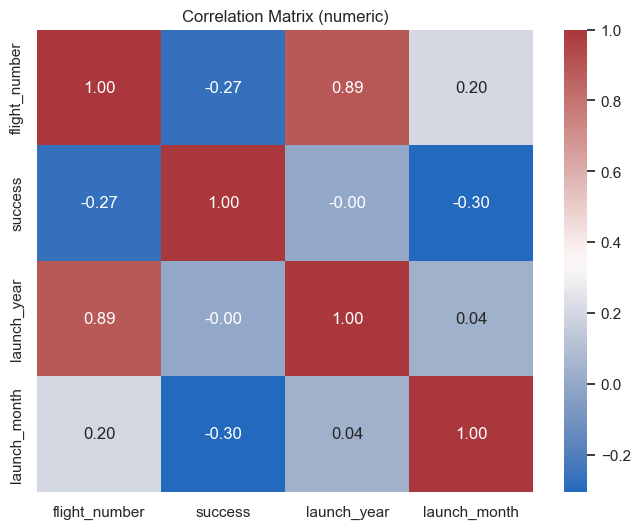

In [7]:
# 7. Correlation Heatmap
numeric = df.select_dtypes(include=[np.number])
if not numeric.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric.corr(), annot=True, fmt='.2f', cmap='vlag')
    plt.title('Correlation Matrix (numeric)')
    plt.show()
else:
    print('No numeric columns available for correlation matrix.')


In [8]:
# 8. Export Files & Final Notes
print('Cleaned data saved as cleaned_spacex_api.csv (overwrite if rerun).')
print('\nFiles in current directory:')
print([f for f in os.listdir('.') if f.endswith('.csv')])

print('\nNext steps:')
print('- Add a README.md describing project goal, tools, and key findings.')
print('- Build a Plotly Dash app or static report to showcase interactive visuals.')
print('- Push this notebook (.ipynb) and cleaned CSV to your GitHub repository.')


Cleaned data saved as cleaned_spacex_api.csv (overwrite if rerun).

Files in current directory:
['cleaned_spacex_api.csv', 'spacex_api.csv']

Next steps:
- Add a README.md describing project goal, tools, and key findings.
- Build a Plotly Dash app or static report to showcase interactive visuals.
- Push this notebook (.ipynb) and cleaned CSV to your GitHub repository.



## Final Insights & Recommended Next Steps

- Dataset cleaned and interactive + static visualizations created to explore launch trends.  
- Next: build predictive models using Logistic Regression / Random Forest on `success`.  
- Create a Plotly Dash dashboard with filters for Launch Site, Rocket, and Year.

**Tip for GitHub:** include `cleaned_spacex_api.csv`, this notebook, README.md, and a link to a deployed Dash app (if made).